In [1]:
import numpy as np
import matplotlib.pyplot as plt

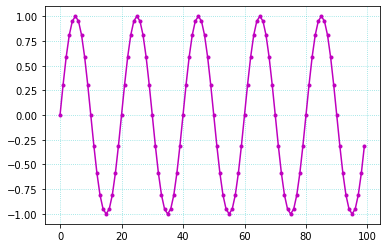

In [2]:
t = np.linspace(0, 100, 100, endpoint=False)
x = np.sin(0.1*np.pi*t)
fig, ax = plt.subplots()
ax.plot(t, x, color='m', marker='o', markersize=3)
ax.grid(color='c', alpha=0.5, linestyle=':')
plt.show()

## 一、相关性分析

In [3]:
# 计算相关性。由于左右偏移的相关性计算结果对称，这里只取一半的结果。
corr = np.correlate(x, x, 'full')[-len(x):]
print(corr.shape)
print(corr[:20])

(100,)
[ 50.          47.55282581  40.54634122  29.75253388  16.29634122
   1.53884177 -13.06027324 -26.08706509 -36.31027324 -42.79754323
 -45.         -42.79754323 -36.50125625 -26.81360762 -14.75125625
  -1.53884177  11.51518827  23.14813883  32.26518827  38.04226065]


In [4]:
# 计算二阶差分。
inflection = np.diff(np.sign(np.diff(corr)))
print(inflection)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.
  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.
  0.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.
  0.  0.  0.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.
  0.  0.  0.  0.  0.  0.  0.  0.]


In [5]:
# peaks是二阶差分小于0的位置，经过转换可以得到acf出现极大值（尖峰）的位置。
# 例如：原始数据[1, 2, 5, 1, 1] -> 一阶差分[1, 3, -4, 0] -> 二阶差分[2, -7, 4]
# 此时-7的位置为index=1，+1后，得到原始数据尖峰5出现的位置index=2
# 同理，peaks中的peaks[0]=20对应acf中第一个尖峰40.0出现的位置index=20（acf[20]=40.0）
peaks = (inflection < 0).nonzero()[0] + 1 
print(peaks)

[20 40 60 80]


In [6]:
# peaks找出了所有极大值（尖峰）的位置（即lag值）。其中，值最大的尖峰表示相关性最大，对应的lag值即为周期
period = peaks[corr[peaks].argmax()] 
print(period)

20


## 二、傅立叶变换

In [16]:
# 傅立叶变换
ft = np.fft.rfft(x)
# 频率f
freqs = np.fft.rfftfreq(len(x), 1)
mags = abs(ft)
print(ft[:20])
print(freqs[:20])

[-6.72936759e-16+0.00000000e+00j -2.21668438e-15+6.66425954e-16j
  9.24299986e-16+2.05133115e-15j -1.24822373e-15+3.47263182e-15j
  6.81776088e-17+9.46910502e-15j -3.20088954e-14-5.00000000e+01j
  6.89389277e-16-9.84728717e-15j -1.76123093e-15-5.77176773e-15j
  3.24837130e-16-3.80721464e-15j -1.38526112e-15-2.84920502e-15j
  4.39153168e-16-4.11476010e-15j -2.41498633e-15-1.98047730e-15j
  6.73662203e-16-1.81726660e-15j -3.09669156e-15-1.49628205e-15j
  1.00249024e-15-1.30021446e-15j -1.59704100e-15-1.81915261e-15j
  7.32816108e-16-1.37488976e-15j -5.18101893e-15-1.43465164e-15j
  7.74740233e-16-8.32612829e-16j -1.46622487e-14-7.94250104e-16j]
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19]


In [11]:
# 寻找极大值对应的尖峰
inflection = np.diff(np.sign(np.diff(mags)))
peaks = (inflection < 0).nonzero()[0] + 1
print(peaks)

[ 1  5 10 13 15 17 20 23 27 30 33 35 37 39 41 43 45 47 49]


In [13]:
# 寻找最大值对应的尖峰peak
peak = peaks[mags[peaks].argmax()]
# 寻找peak对应的频率signal_freq
signal_freq = freqs[peak]
print(peak)
print(signal_freq)

5
0.05


In [14]:
# 周期与频率的关系：period=1/signal_freq
period = int(1 / signal_freq)
print(period)

20
